# Prathmesh Rajendra Deshmukh

# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

In [1]:
##importing all the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Importing and visualizing the data

In [2]:
##reading the data csv file from website directly
df = pd. read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
        

In [3]:
## checking first 5 rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
##getting the basic information of dataset such as mean,median, standard deviation,maximum,minimum

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0,0.5,'Scores in Percentage')

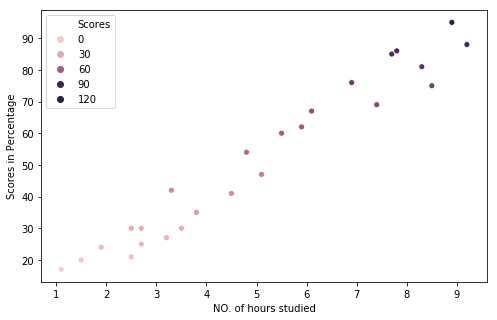

In [5]:
## here we will plot the distribution of scores on scatterplot using seaborn library

plt.figure(figsize=(8,5))
sns.scatterplot(df['Hours'],df['Scores'],hue=df['Scores'])
plt.xlabel("NO. of hours studied")
plt.ylabel("Scores in Percentage")

###### from the above grapgh we can see as number of hours studied increases the score in percentage also increases ,this implies that there is positive correlation between the two variables

### Praparing and cleaning the data 

Here our dataset is small and there are no missing values or no outliers so we can directly start building our model

In [6]:
## assigning the columns to variables and creating attibiutes and lables for input and output
X=df["Hours"]
y=df["Scores"]
X=df.iloc[:, :-1].values  
y=df.iloc[:, 1].values  


In [7]:
##importing the libraries for modle building and modle training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

## Training the Algorithm 

In [8]:
## Dividing the data into training and testing dataset for building model we have divided the data set into 70:30 means 70% of data will be used for training and 30% of data will be used for testing

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
##creating an obeject for linear regression model 
##fitting data into model and training the modle
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
## creating an bestfit line for linear regression
bestfit = regressor.coef_*X+regressor.intercept_

Text(0,0.5,'Score in  percentage')

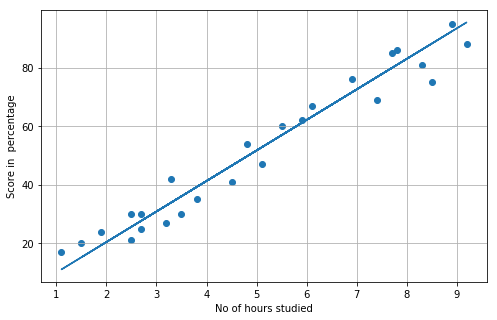

In [11]:
##visualizing the data and best fir line
plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X,bestfit)
plt.grid()
plt.xlabel("No of hours studied")
plt.ylabel("Score in  percentage")

## Making Predictions
Now that we have trained our algorithm, we can make some predictions.

In [12]:
#creating a variable to store the prediction corresponding to test data
y_predict=regressor.predict(X_test)

In [13]:
#creating the dataframe for actual values and predicted values
df2=pd.DataFrame({"actual":y_test,"predicted":y_predict})

In [14]:
df2

,actual,predicted
0,17,11.029003
1,21,25.628017
2,24,19.371297
3,88,95.494730
4,76,71.510634
5,25,27.713591
6,75,88.195222
7,30,25.628017


In [15]:
##predicting for a random value  
x2=([[6.5]])
y1=regressor.predict(x2)
print("No of Hours studeid = {}".format(x2))
print("Predicted Score = {}".format(y1[0]))

No of Hours studeid = [[6.5]]
Predicted Score = 67.33948730742844


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 
For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 5.936576124243742


This absolute error is the mean error between observed values and predicited values